# Running the model

Setup a `feisty` integration.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

import feisty

## Configure testcase to run


In [3]:
settings_in = dict()
settings_in["benthic_prey"] = {
    "defaults": {"benthic_efficiency": 0.075, "carrying_capacity": 0},
    "members": [{"name": "benthic_prey"}],
}
settings_in["food_web"] = [
    {"predator": "Sf", "prey": "Zoo", "preference": 1.0},
    {"predator": "Sp", "prey": "Zoo", "preference": 1.0},
    {"predator": "Sd", "prey": "Zoo", "preference": 1.0},
    {"predator": "Mf", "prey": "Zoo", "preference": 0.45},
    {"predator": "Mf", "prey": "Sf", "preference": 1.0},
    {"predator": "Mf", "prey": "Sp", "preference": 1.0},
    {"predator": "Mf", "prey": "Sd", "preference": 1.0},
    {"predator": "Mp", "prey": "Zoo", "preference": 0.45},
    {"predator": "Mp", "prey": "Sf", "preference": 1.0},
    {"predator": "Mp", "prey": "Sp", "preference": 1.0},
    {"predator": "Mp", "prey": "Sd", "preference": 1.0},
    {"predator": "Md", "prey": "benthic_prey", "preference": 1.0},
    {"predator": "Lp", "prey": "Mf", "preference": 0.5},
    {"predator": "Lp", "prey": "Mp", "preference": 1.0},
    {"predator": "Lp", "prey": "Md", "preference": 1.0},
    {"predator": "Ld", "prey": "Mf", "preference": 0.375},
    {"predator": "Ld", "prey": "Mp", "preference": 0.75},
    {"predator": "Ld", "prey": "Md", "preference": 1.0},
    {"predator": "Ld", "prey": "benthic_prey", "preference": 1.0},
]

## Run the model


In [4]:
ds_out = feisty.config_and_run_testcase(
    "tanh_shelf",
    "cyclic",
    730,
    settings_in=settings_in,
    diagnostic_names=[
        "T_habitat",
        "ingestion_rate",
        "predation_flux",
        "predation_rate",
        "metabolism_rate",
        "mortality_rate",
        "energy_avail_rate",
        "growth_rate",
        "reproduction_rate",
        "recruitment_flux",
        "fish_catch_rate",
        "encounter_rate_link",
        "encounter_rate_total",
        "consumption_rate_max_pred",
        "consumption_rate_link",
    ],
)

/glade/work/mlevy/miniconda3/envs/dev-feisty/lib/python3.10/site-packages/xarray/core/dataset.py:2172: FutureWarning: None value for 'chunks' is deprecated. It will raise an error in the future. Use instead '{}'
  warnings.warn(


Starting template generation at 14:44:48
Starting run() at 14:44:48
Integrating 730 steps (starting at 14:44:48)
Starting a new output dataset for timestep 365 (14:44:58)
Finished _solve at 14:45:08


# Output


In [5]:
ds_out.info()

xarray.Dataset {
dimensions:
	time = 730 ;
	group = 9 ;
	X = 22 ;
	fish = 8 ;
	feeding_link = 19 ;

variables:
	object time(time) ;
	object group(group) ;
	float64 X(X) ;
	object fish(fish) ;
	object feeding_link(feeding_link) ;
	float64 biomass(time, group, X) ;
	float64 T_habitat(time, fish, X) ;
	float64 ingestion_rate(time, fish, X) ;
	float64 predation_flux(time, fish, X) ;
	float64 predation_rate(time, fish, X) ;
	float64 metabolism_rate(time, fish, X) ;
	float64 mortality_rate(time, fish, X) ;
	float64 energy_avail_rate(time, fish, X) ;
	float64 growth_rate(time, fish, X) ;
	float64 reproduction_rate(time, fish, X) ;
	float64 recruitment_flux(time, fish, X) ;
	float64 fish_catch_rate(time, fish, X) ;
	float64 encounter_rate_link(time, feeding_link, X) ;
	float64 encounter_rate_total(time, fish, X) ;
	float64 consumption_rate_max_pred(time, fish, X) ;
	float64 consumption_rate_link(time, feeding_link, X) ;
	<U2 predator(feeding_link) ;
	<U12 prey(feeding_link) ;

// global attrib

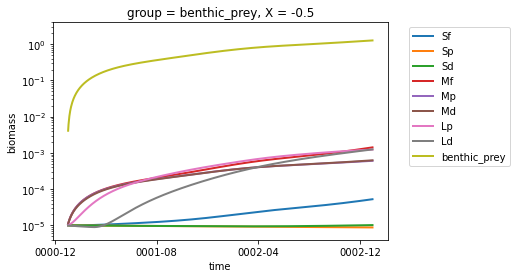

In [6]:
test_ds = ds_out.isel(X=0, time=0)
for group in test_ds.group.data:
    ds_out.biomass.sel(group=group).isel(X=0).plot(linewidth=2)
plt.ylim([4e-6, 4])
plt.yscale("log")
plt.legend(test_ds.group.data, bbox_to_anchor=(1.05, 1.0));